# Computer Infrastructure Assessment

### Setup

Import required packages for effective operation of notebook

In [44]:
# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# Yahoo finance data - yFinance (https://github.com/ranaroussi/yfinance)
import yfinance as yf

# Plots
import numpy as np

# Creating plots
import matplotlib.pyplot as plt

# Import for shorter xaxis dates
import matplotlib.dates as mdates

# Listing data files
import os


### Assessment Tasks

1. Write a function titled `get_data()` which downloads the previous 5 day hourly data for the FAANG stocks, and save into a `data` folder, titled accordingly.
2. Plot the data for each stock, using the function `plot_data()`.
3. Write `faang.py` script to perform task 1 and 2.
4. Create GitHub Actions workflow to run script `faang.yml` every Saturday morning.

#### <u>Problem 1.</u> Funtion Creation

To create the `get_data` function, `yf.download` is used, specifying different parameters within the code to align with the 5 day look back, and hourly data.

In [45]:
# Use yf.download to download hourly data over previos 5 days
#Source: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')

# Show first 3 rows of the results
get_data.head(3)

/tmp/ipykernel_23106/2355352707.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  

[3 rows x 25 columns]

In [46]:
# Show last 3 rows of the results
get_data.tail(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-17 17:30:00+00:00  273.019989  223.789993  300.750000  657.414978   
2025-12-17 18:30:00+00:00  273.785004  222.914993  298.779999  653.034973   
2025-12-17 19:30:00+00:00  273.739990  222.813202  298.157104  652.594971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-17 17:30:00+00:00  95.714996  273.690002  224.550003  301.429993   
2025-12-17 18:30:00+00:00  95.235001  273.970001  223.759995  300.730011   
2025-12-17 19:30:00+00:00  95.186501  274.010010  223.089996  298.924988   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-17 17:30:00+00:00  661.229980  95.970001  ...  272.880005  223.654694   
2025-12-17 18:30:00+00:00  657.909973  95.779999  ...  272.990112  223.750000   
2025-12-17 19:30:00+00:00  653.645020  95.360001  ...  273.769989  222.899994   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-17 17:30:00+00:00  301.259888  659.432312  95.805000  1699122   
2025-12-17 18:30:00+00:00  300.709991  657.400024  95.709999  2046363   
2025-12-17 19:30:00+00:00  298.760010  653.119995  95.235001   180363   

Price                                                          
Ticker                        AMZN     GOOG    META      NFLX  
Datetime                                                       
2025-12-17 17:30:00+00:00  5889856  1162097  833836   2263349  
2025-12-17 18:30:00+00:00  2143325  1164330  798722  12301247  
2025-12-17 19:30:00+00:00   147101   113871   51566    135487  

[3 rows x 25 columns]

The above code can be seen to pull the requested data for the 5 listed stocks (Facebook, Apple, Amazon, Netflix, Google) over the previous 5 days with 1 hour intervals. This is listed with the earliest dates first, up to the most recent data at the end of the list.

With the required information now downloaded, the following code can then be used to save it per the required naming convention; `YYYMMDD-HHmmss.csv`. To do this, the current time which is also the same time as the script is ran, needs to be determined using ``datetime``.

In [47]:
# Use datetime module to confirm current time.
# Source: https://docs.python.org/3/library/datetime.html#format-codes
now = dt.datetime.now()

# Show output
now


datetime.datetime(2025, 12, 17, 19, 35, 18, 666499)

This needs to be converted into a string, in the correct format using ``now.strftime`` ([Source](https://www.w3schools.com/python/python_datetime.asp)).

Per the format codes, the ``now`` datetime can be converted into a string using:
- %Y - for year
- %m - for month
- %d - for date of month
- %H - for hour (24 hour format)
- %M - for minute
- %S - for second

In [48]:
# Convert date and time into string.
now.strftime('%Y%m%d-%H%M%S')

'20251217-193518'

For simplification, the above 2 codes can be merged, while still capturing the exact time the code is ran in a string format. 

In [49]:
# Capture date and time code is ran, and present as a string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Show
time_stamp

'20251217-193518'

It is now possible to use this string as the filename, adding `.csv` at the end.

By adding `data/` infront of the filename, this directs the file to the the data folder. Since the `data` folder is located in the root of the repository, which so too is this notebook and `faang.py`, there is therefore no need to direct the file up a level before specifying the data folder.

In [50]:
# File location is the 'data' folder, and file will be a .csv file.
'data/' + dt.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'

'data/20251217-193518.csv'

All this can now be pulled together, to save the previous 5 days for the given stocks into the `data` folder.

In [51]:
# Pull previous 5 days of data
get_data = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period= '5d', interval= '1h', auto_adjust=True)

# Generate time stamp of when data was pulled and convert to string
time_stamp = dt.datetime.now().strftime('%Y%m%d-%H%M%S')

# Save into 'data' folder as a .csv file, titling file with time_stamp.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
get_data.to_csv('data/' + time_stamp + '.csv')

[*********************100%***********************]  5 of 5 completed


### Problem 2: Plotting the Data

To plot the data, the first step is confirming the list of files in the `data` folder. This can be done by using `os.listdir`. 

Source: https://www.geeksforgeeks.org/python/python-os-listdir-method/.

In [52]:
# Specify location of files
data_files = os.listdir('./data/')

# Show
data_files

['20251209-185939.csv',
 '20251217-193518.csv',
 '20251210-190038.csv',
 '20251213-092708.csv',
 '20251214-143835.csv',
 '20251217-185154.csv']

This shows the list of files in the data folder, but to ensure the most recent one is used for the plot, the `.sort()` ([source](https://www.geeksforgeeks.org/python/sort-in-python/)) command is required. Using the `reverse=True` parameter will arrange them in the most recent to the top.

In [53]:
# Sort the list of files.
data_files.sort(reverse=True)

# Show rearranged list.
data_files

['20251217-193518.csv',
 '20251217-185154.csv',
 '20251214-143835.csv',
 '20251213-092708.csv',
 '20251210-190038.csv',
 '20251209-185939.csv']

Now that the list has been arranged, by specifying the first filename `[0]`, the most recent file is selected for the plot creation.

Prior to doing this, a quick check is done to ensure the information is being pulled in correctly.

In [54]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest)

#show first 5 rows
df.head(5)

,Price,Close,Close.1,Close.2,Close.3,Close.4,High,High.1,High.2,High.3,...,Open,Open.1,Open.2,Open.3,Open.4,Volume,Volume.1,Volume.2,Volume.3,Volume.4
0,Ticker,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,...,AAPL,AMZN,GOOG,META,NFLX,AAPL,AMZN,GOOG,META,NFLX
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-12-11 14:30:00+00:00,276.1199951171875,230.8800048828125,317.05999755859375,652.6099853515625,94.3949966430664,279.5799865722656,232.11000061035156,321.989990234375,655.280029296875,...,279.0950012207031,230.7100067138672,320.94000244140625,642.72998046875,93.8550033569336,6887208,4677750,3634473,2302563,9038298
3,2025-12-11 15:30:00+00:00,275.82501220703125,228.85000610351562,315.54998779296875,646.6099853515625,94.08499908447266,276.5899963378906,231.0399932861328,317.8900146484375,653.1849975585938,...,276.114990234375,230.86000061035156,317.07501220703125,652.5399780273438,94.3949966430664,2343607,2150176,1521142,990587,4362495
4,2025-12-11 16:30:00+00:00,277.9049987792969,230.08250427246094,316.05999755859375,648.8400268554688,94.62000274658203,278.17999267578125,230.27999877929688,316.5400085449219,649.719970703125,...,275.82000732421875,228.88999938964844,315.5249938964844,646.7100219726562,94.08499908447266,2412367,1738077,1109293,586515,3473366


The above is correct however, it can be seen that rows 0 and 1 are headers, with row 2 being redundant. This needs to be factored into the `read_csv` command.

In [55]:
# Read in the CSV file
# header=[0,1] specifies the use of row 0 and 1 as the column names
# skiprows=[2] skips row 2
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Show first 3 rows
df.head(3)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-12-11 14:30:00+00:00  276.119995  230.880005  317.059998  652.609985   
2025-12-11 15:30:00+00:00  275.825012  228.850006  315.549988  646.609985   
2025-12-11 16:30:00+00:00  277.904999  230.082504  316.059998  648.840027   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
2025-12-11 14:30:00+00:00  94.394997  279.579987  232.110001  321.989990   
2025-12-11 15:30:00+00:00  94.084999  276.589996  231.039993  317.890015   
2025-12-11 16:30:00+00:00  94.620003  278.179993  230.279999  316.540009   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
2025-12-11 14:30:00+00:00  655.280029  94.510002  ...  279.095001  230.710007   
2025-12-11 15:30:00+00:00  653.184998  94.680000  ...  276.114990  230.860001   
2025-12-11 16:30:00+00:00  649.719971  94.820000  ...  275.820007  228.889999   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
2025-12-11 14:30:00+00:00  320.940002  642.729980  93.855003  6887208   
2025-12-11 15:30:00+00:00  317.075012  652.539978  94.394997  2343607   
2025-12-11 16:30:00+00:00  315.524994  646.710022  94.084999  2412367   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
2025-12-11 14:30:00+00:00  4677750  3634473  2302563  9038298  
2025-12-11 15:30:00+00:00  2150176  1521142   990587  4362495  
2025-12-11 16:30:00+00:00  1738077  1109293   586515  3473366  

[3 rows x 25 columns]

This is now correct, and can be used for the plot.

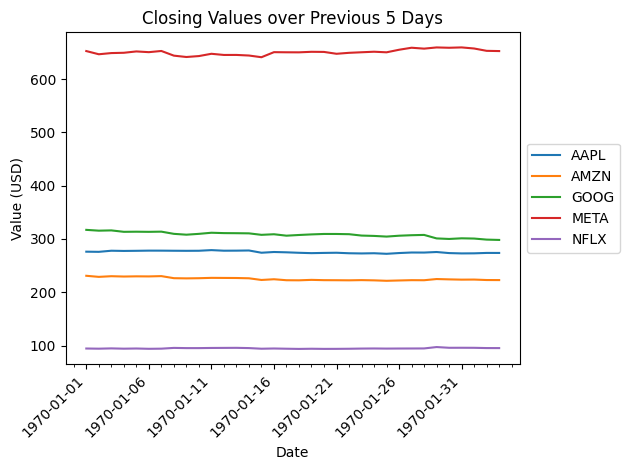

In [56]:
# Specify first file in data_files group (index=0)
latest = data_files[0]

# Specify data folder as location to find the file.
datadir = './data/'

# Read in the CSV file
df= pd.read_csv(datadir + latest, index_col=0, header=[0,1], skiprows=[2])

# Plot the 'close' data and adjust visuals.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
plot_data = df['Close'].plot(title = 'Closing Values over Previous 5 Days', xlabel='Date', ylabel='Value (USD)')

# Create shorter date format for plot
# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html
plot_data.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add minor ticks
# Source: https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py
plot_data.xaxis.set_minor_locator(mdates.DayLocator())

# Rotate x-axis lables 45°
plt.xticks(rotation=45, horizontalalignment='right')

# Move legend off chart area
# Source: https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
plot_data.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot file name using same time_stamp as data saving
filename = "./plots/" + time_stamp + ".png"

# Adjust plot layout area
# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.tight_layout()

# Save plot.
# Source: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig(filename, dpi=500, bbox_inches= 'tight')

### Problem 3: Create Script

For the script, `faang.py` was created in the main repository. Within this, the above three codes were copied over:
- Firstly to pull the 5 day, hourly data for each of the stocks.
- The second to generate a timestamp of when the data was pulled.
- The third to save the data into the `data` folder.
- The fourth to create a plot and save into the plots folder.

To run each of these, the same specific packages are needed and were added to the `faang.py` code:
- `yfinance` to pull the required stock data.
- `datetime` to create the timestamp.
- `pandas` for data analysis
- `matplotlib.pyplot` for plot adjustments
- `matplotlib.mdates` to shorten z-axis titles

The full code can be seen in `faang.py`.

##### <u>_Running `faang.py`_</u>

This `faang.py` code can be ran as normal using `python faang.py` in the main terminal however, to have the code operate when the user types `./faang.py`, firstly a shebang line (`#! /usr/bin/env python`) needed to be added to the very beginning of the code.

By adding the shebang line, it specifies the path to Python and means the user does not have to type `python` before the script name [source](https://realpython.com/python-shebang/).

One final check, to ensure the script functions properly, was to allow the file have permission to execute. To do so, in the same location as the `faang.py` script, in the terminal `chmod u+x faang.py` was executed. This changed the script, allowing the user `u` to execute `x` the script.

To ensure it worked, `ls -l faang.py` was ran in the same terminal, outputting below, thus confimring it is executable given the `x` in `rwx`. 

```-rwxrw-rw- 1 codespace codespace 495 Nov  7 13:59 faang.py```

The script can be ran in the terminal by simply typing `./faang.py`.

### Problem 4: Automation

Automating the `faang.py` code so that it runs and performs all the tasks is done through GitHub actions ([source](https://docs.github.com/en/actions/get-started/quickstart)), but requires setting up first.

Initially a folder called `.github` was created in the root of the repository, and within this another folder called `workflows`. This can be found ([Here](https://github.com/danielfinnerty/computer_infrastructure/tree/main/.github/workflows)).

Within the `workflows` folder, a file titled `faang.yml` was created. This is the file which contains the code required to correctly run the automation. The code itself was generated by AI based off several key prompts provide, which were the tasks the code was expected to do.

***
_I need to write a GitHub actions script in YAML. I want it to:_
1. _Clone my repository._
2. _Run a script called download.py_
3. _Commit all changes to the repo_
4. _Push those changes back to GitHub.com_
***
The ChatGPT promt can be found [Here](https://chatgpt.com/share/6936f40a-71ec-8012-a8ca-88a93364cfd3)

This code was added to the `faang.yml` file with two items corrected:

- The cron, which determines the time and day in which the code is ran. In this case the cron schedule is `5 9 * * 6` which is 09:05 on every Saturday ([cron source](https://crontab.guru/#5_9_*_*_6))
- The name of the code which was required to be ran had to be corrected to `faang.py`.

This ensured the `faang.py` code, which pulls the five stocks hourly closing values, saves into the `data` folder, creates a plot, and saves that into the `plots` folder, occurs every Saturday morning and 9:05.



# End